# Machine Learning - Algorithms

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, auc

from sklearn.pipeline import Pipeline

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_moons

## Linear Regression
- 입력 특성에 따른 선형함수를 만들어 예측
- Least Squares Method(STAT), Gradient Descent(ML)

In [6]:
data = pd.read_csv('./ADP_book_ver01/data/insurance.csv')

In [7]:
x = data['age']
y = data['charges']

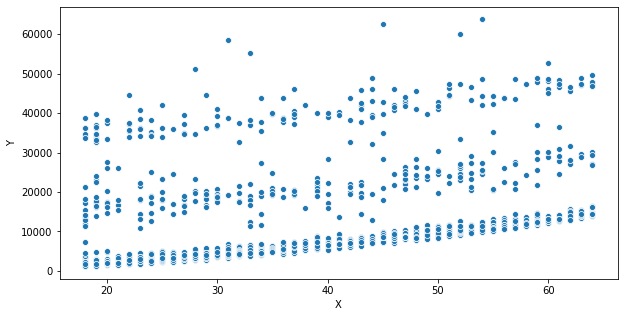

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=x.ravel(), y=y.ravel())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
x = np.array(data['age']).reshape(len(x), 1)
y = np.array(data['charges']).reshape(len(y), 1)

In [10]:
print(x.shape, y.shape)

(1338, 1) (1338, 1)


### (1) LinearRegressor

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
### Model fit
lr = LinearRegression()
lr.fit(x, y) # 2D array 필요

LinearRegression()

In [13]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [14]:
print(lr.score(x, y))

0.08940589967885804


In [15]:
# predict new data
x_new = [[19],[64]]
y_pred = lr.predict(x_new)
print(y_pred)

[[ 8062.61476073]
 [19660.13260074]]


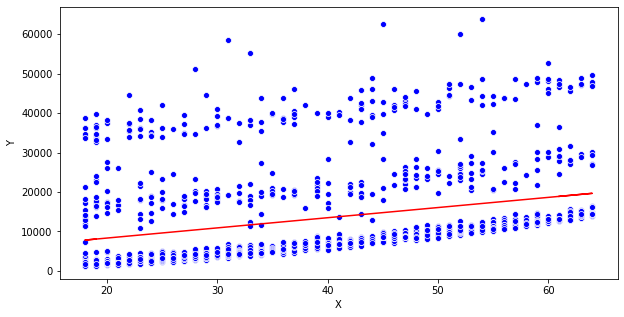

In [16]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, lr.coef_*x + lr.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
### Weighted Model
x_weight = x + 5
w_lr = LinearRegression()
w_lr.fit(x, y, sample_weight=x_weight.ravel()) # 2D array 필요

LinearRegression()

In [18]:
print('선형 회귀 모델 결과')
print('절편', w_lr.intercept_, '계수', w_lr.coef_)

선형 회귀 모델 결과
절편 [2776.05842125] 계수 [[266.6494531]]


### (2) SGDRegressor
- Gradient Descent

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel()) 

SGDRegressor(random_state=34)

In [21]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [-3734.55852602] 계수 [307.9244087]


In [22]:
# predict new data
x_new = [[19], [64]]
y_pred = sgd_reg.predict(x_new)
print(y_pred)

[ 2116.00523922 15972.60363057]


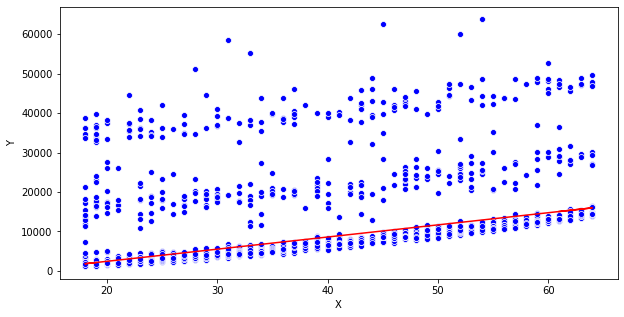

In [23]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, sgd_reg.coef_*x + sgd_reg.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Polynomial Regression
- Overfitting을 주의해야 함

### (1) Polynomial Function

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [25]:
# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', x)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [26]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

x = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값: ', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값:  [  5 125]


In [27]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [28]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### (2) Simple Polynomial Regression

In [29]:
### cereal data
cereal = pd.read_csv('./ADP_book_ver01/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [30]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


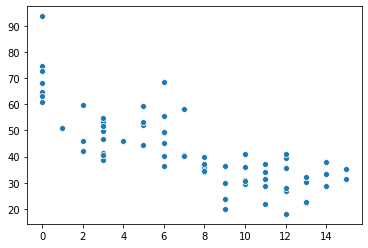

In [31]:
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

sns.scatterplot(x=x, y=y)
plt.show()

In [32]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)

(53,) (23,)


In [33]:
### Extract poly features
poly_reg = PolynomialFeatures(degree=2) # 2차
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
### Model fit
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [36]:
### Predict
x_test_poly = poly_reg.transform(x_test.reshape(-1, 1))
pred = reg.predict(x_test_poly)

In [37]:
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[51.63225287 46.658844  ]
 [32.10406283 28.742414  ]
 [55.79061653 59.642837  ]
 [31.07790457 37.840594  ]
 [32.10406283 31.435973  ]
 [44.46041881 44.330856  ]
 [38.81510912 40.400208  ]
 [41.44694842 55.333142  ]
 [41.44694842 49.120253  ]
 [31.38037899 27.753301  ]
 [36.56490091 34.384843  ]
 [34.6963238  29.924285  ]
 [65.25223713 63.005645  ]
 [33.20937777 31.072217  ]
 [44.46041881 52.076897  ]
 [38.81510912 40.448772  ]
 [51.63225287 53.131324  ]
 [36.56490091 33.983679  ]
 [41.44694842 49.511874  ]
 [31.03832623 22.736446  ]
 [31.38037899 39.259197  ]
 [31.499114   31.230054  ]
 [32.10406283 21.871292  ]]


In [38]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test.reshape(-1, 1)), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


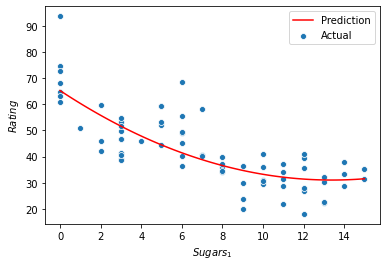

In [39]:
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

sns.scatterplot(x=x, y=y, label='Actual')
sns.lineplot(x=x_new.reshape(1, -1)[0], y=y_new.reshape(1, -1)[0], color='red', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

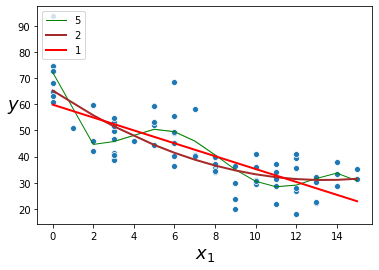

In [40]:
# Degree 별 그래프 변화
for color, style, width, degree in (("green", "dotted", 1, 5), ("brown", "dashed", 2, 2), ("red", "solid", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x_train.reshape(-1, 1), y_train)
    y_newbig = polynomial_regression.predict(x_test.reshape(-1, 1))
    sns.lineplot(x=x_test, y=y_newbig, color=color, linestyle=style, label=str(degree), linewidth=width)

sns.scatterplot(x=x, y=y)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### (2) Multi-variable Polynomial Regression

In [41]:
x = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [43]:
### Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [44]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [45]:
### Predict
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

In [46]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	11.398
MAE	2.298
RMSE	3.376
ACC	91.259%


## Multiple Regression with Penalty
- 여러 개의 독립변수로 회귀분석
- Overfitting 방지를 위해, 다양한 규제 적용 필요
- 변수선택법은 주로 통계적 회귀분석에 적용됨

In [47]:
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

### (1) Ridge Regression
- L2 penalty 추가
- 계수 추정치가 0으로 수렴 (not 0)
- alpha: 0이면 규제 없음. 커질수록 강한 규제

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [49]:
lr = LinearRegression() ### 비교 모델
lr.fit(x, y)

LinearRegression()

In [50]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # 정규방정식
ridge_reg.fit(x, y)
ridge_reg.predict(x.iloc[1].values.reshape(1, -1))

array([90.99902729])

In [51]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)  # 확률적 경사 하강법
sgd_reg.fit(x, y.ravel())
sgd_reg.predict(x.iloc[1].values.reshape(1, -1))

array([88.25574167])

In [52]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


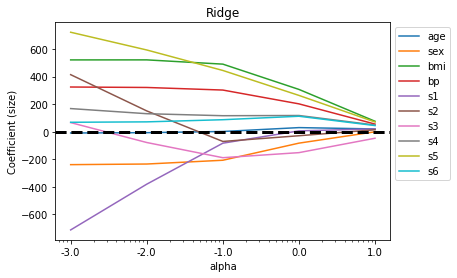

In [53]:
### Log graph
plt.semilogx(df_ridge) 
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

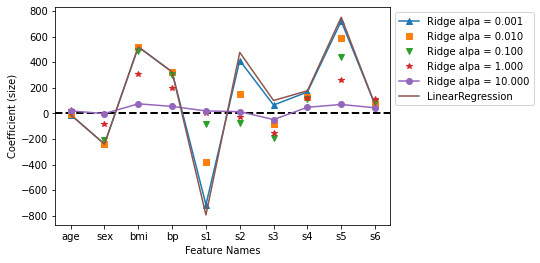

In [54]:
### 일반적인 Regression과 비교
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [55]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    sns.scatterplot(x=x.loc[:, 'bmi'], y=y)
    for alpha, style in zip(alphas, (("blue", "solid"), ("green", "dashed"), ("red","dotted"))):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model)])
        model.fit(x.loc[:, 'bmi'].values.reshape(-1, 1), y)
        x_new = x.loc[:, 'bmi']
        y_new_regul = model.predict(x_new.values.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        sns.lineplot(x=x_new, y=y_new_regul, color=style[0], linestyle=style[1], linewidth=lw, label=r"$\alpha = {}$".format(alpha))

    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("$x_1$", fontsize=12)

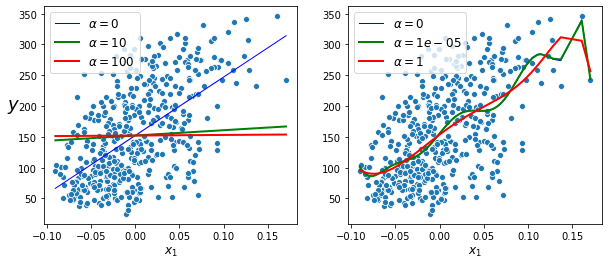

In [56]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

### (2) Lasso Regression
- L1 panelty 추가
- 변수 개수가 많은 경우, Ridge 해석의 어려움을 해결하기 위한 방법
- 덜 중요한 특징의 가중치를 없앰 (Sparse model)
- 특성 수(p)가 데이터 수(n)보다 많거나, 강하게 연관된 경우 추천하지 않음 (ElasticNet 권장)

In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict(x.iloc[1].values.reshape(1, -1))

array([73.84042028])

In [59]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


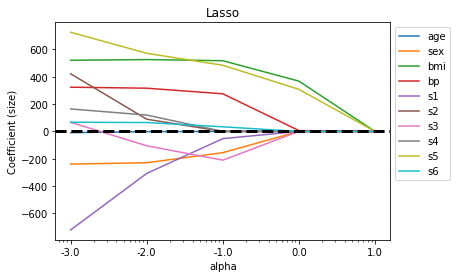

In [60]:
### Log graph
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

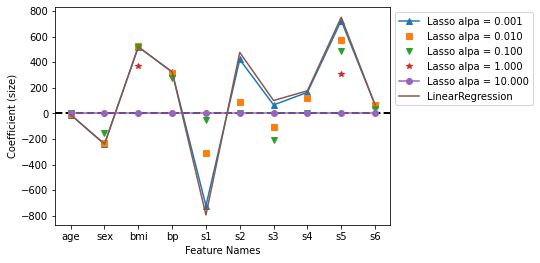

In [61]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^-', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

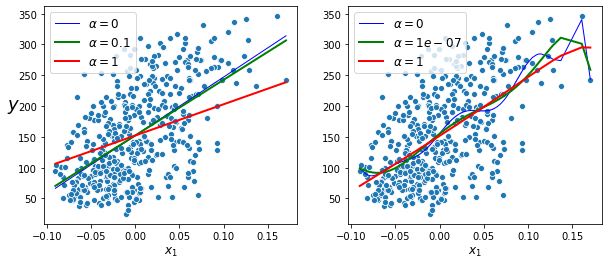

In [62]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

### (3) ElasticNet
- Ridge + Lasso
- r(l1_ratio)로 두 규제항의 비율 조정. 0이면 Ridge, 1이면 Lasso

In [63]:
from sklearn.linear_model import ElasticNet

In [64]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.85718044])

In [65]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


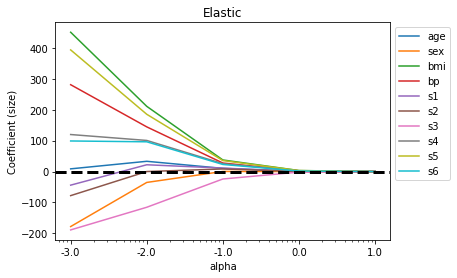

In [66]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

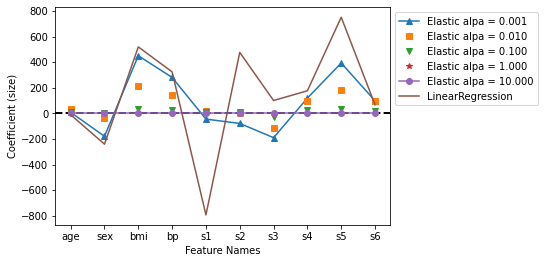

In [67]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [68]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.85718044])

### (4) Huber Regression
- Huber loss function 사용
- Error가 작을 때에는 L2-error, 클 때는 L1-error
- 미분 불가능한 L1의 단점과, outlier에 민감한 L2의 단점 극복

In [69]:
### scikit-learn 버전을 올려야 정상 동작함
# !pip install scikit-learn==0.24.0
from sklearn.linear_model import HuberRegressor

In [70]:
huber = HuberRegressor()

In [71]:
huber.fit(x, y)

HuberRegressor()

In [72]:
huber.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

In [73]:
huber.score(x, y) # R2-score

0.5145343853749351

In [74]:
huber.predict(x.iloc[:1,])

array([204.63982039])

### (5) Quantile Regression
- 조건부 분위수를 모델링

In [75]:
import statsmodels.formula.api as smf

In [76]:
q_df = x.copy()
q_df['y'] = pd.Series(y)

qs = [0.1, 0.25, 0.5, 0.75, 0.9]
intercepts = []
slopes = []
pred_dict = dict()
for q in qs:
    quantile_reg = smf.quantreg('y ~ ' + (' + '.join(list(x.columns))), q_df).fit(q=q)
    pred_dict[q] = quantile_reg.predict(x)
    
pred_df = pd.concat([pd.DataFrame(pred_dict).reset_index(drop=True), q_df['y'].reset_index(drop=True)], axis=1)
pred_df.head()

,0.1,0.25,0.5,0.75,0.9,y
0,114.389089,160.512754,203.995040,250.617046,286.236587,151.0
1,33.529759,54.411765,74.999999,79.408675,114.958581,75.0
2,104.742620,141.000000,174.844178,208.955978,247.041323,141.0
3,75.182544,116.052301,165.542551,218.154601,249.463834,206.0
4,54.849095,91.124629,135.293448,157.830135,199.391970,135.0


In [77]:
### 0.5 quantile regression summary
quantile_reg = smf.quantreg('y ~ ' + (' + '.join(list(x.columns))), q_df).fit(q=0.5)
quantile_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3383
Model:                       QuantReg   Bandwidth:                       34.91
Method:                 Least Squares   Sparsity:                        140.3
Date:                Tue, 26 Sep 2023   No. Observations:                  442
Time:                        21:20:02   Df Residuals:                      431
                                        Df Model:                           10
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.8520      3.336     45.517      0.000     145.295     158.409
age            9.3919     77.386      0.121      0.903    -142.709     161.493
sex         -326.3453     79.294     -4.116      0.000    -482.196    -170.494
bmi          465.8559     86.173      5.406      0.000     296.484     635.228
bp           407.0552     84.733      4.804      0.000     240.513     573.597
s1          -856.7186    539.681     -1.587      0.113   -1917.453     204.016
s2           414.4578    439.111      0.944      0.346    -448.608    1277.524
s3           147.1359    275.268      0.535      0.593    -393.899     688.171
s4           257.9128    209.140      1.233      0.218    -153.149     668.975
s5           762.2344    222.644      3.424      0.001     324.631    1199.838
s6            50.7769     85.462      0.594      0.553    -117.196     218.750
==============================================================================
"""

## Logistic Regression
- 반응변수(Y)가 특정 Class에 속할 확률 모델링 (Logit 함수를 선형 모델링)
- Logit: Log Odds = log(p/1-p)
    - Odds는 실패 대비 성공할 확률 (p/1-p)
    - X가 Unit 증가하면, Odds * exp(계수) 만큼의 Y=1 확률 증가
- Sigmoid(Logistic) Function
- MLE 기법을 사용하여 계수 추정
- 선형 회귀 모델을 기반으로 하기 때문에 결정 경계는 선형이며, Penalty도 줄 수 있음(default=L2, C=1.0)
- C는 alpha의 역수로, C가 높을수록 규제가 줄어듦

### (1) Binary

In [78]:
body = pd.read_csv('./ADP_book_ver01/data/bodyPerformance.csv')

body['gender'] = np.where(body['gender']=='M', 0, 1) # gender encoding
body['class_1'] = np.where(body['class']=='A', 1, 0) # Binary class로 변경
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [79]:
feature_columns = list(body.columns.difference(['class', 'class_1'])) 
x = body[feature_columns]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
### Modeling
logistic=LogisticRegression() ### scikit-learn 0.23.1 환경에서 default (lbfgs) 설정 시 에러 발생할 가능성 있음. solver='liblinear' 설정하여 해결
logistic.fit(x_train, y_train)

LogisticRegression()

In [82]:
proba = pd.DataFrame(logistic.predict_proba(x_train))
cs = logistic.decision_function(x_train) # Decision function: confidence score. x=0 인 hyperplane을 기준으로 양/음수 여부와 얼만큼 멀리 떨어져있는가 측정

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A', 'A', 'decision_function']
df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Not A,A,decision_function
0,1.0,1.555179e-08,-17.979090
1,1.0,7.576542e-08,-16.395624
2,1.0,8.045892e-08,-16.335519
3,1.0,1.153636e-07,-15.975177
4,1.0,1.198107e-07,-15.937352


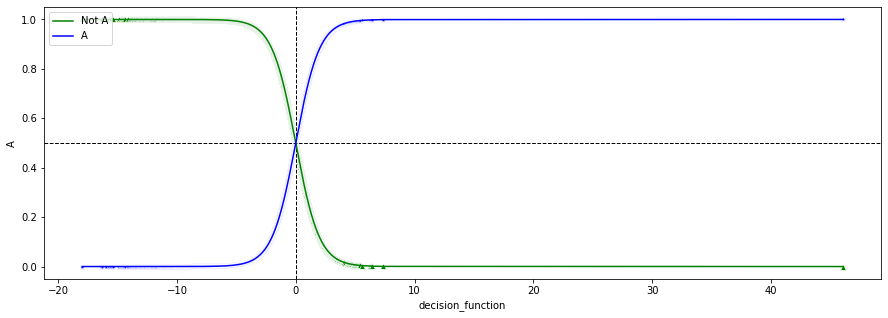

In [83]:
plt.figure(figsize=(15, 5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

sns.lineplot(x=df['decision_function'], y=df['Not A'], color='green', linestyle='dashed', label='Not A')
sns.scatterplot(x=df['decision_function'], y=df['Not A'], color='green', marker='^')
sns.lineplot(x=df['decision_function'], y=df['A'], color='blue', linestyle='dashed', label='A')
sns.scatterplot(x=df['decision_function'], y=df['A'], color='blue', marker='*')

plt.legend(loc='upper left')
plt.show()

In [84]:
pred = logistic.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[2751  263]
 [ 332  672]]
정확도	85.19%
정밀도	71.87%
재현율	66.93%
F1	69.31%


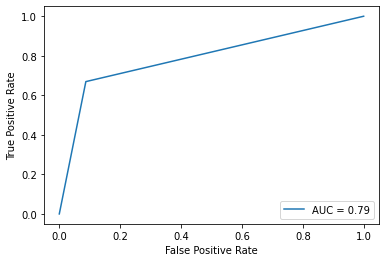

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, pred) 
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve plot_roc_curve(logistic, test_x, test_y)함수가 sklearn 1.2.1부터 대체됨
display.plot()

In [86]:
logistic.predict_proba(x_test)

array([[0.57409795, 0.42590205],
       [0.05982204, 0.94017796],
       [0.20439332, 0.79560668],
       ...,
       [0.99620842, 0.00379158],
       [0.63859905, 0.36140095],
       [0.70717472, 0.29282528]])

### (2) Multiclass (Multinomial: Softmax)

In [87]:
body['gender'] = np.where(body['gender']=='M', 0, 1) # gender 변수 전처리

mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 4} # class 변수 전처리
body['class_2'] = body['class'].map(mapping)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


In [88]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [89]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # multi_class parameter를 multinomial로 입력
softmax.fit(x_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [90]:
pred = softmax.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc * 100, 2)))

[[726 244  34   0]
 [246 440 285  33]
 [ 83 228 499 195]
 [ 14  65 153 773]]
정확도	60.68%


In [91]:
softmax.predict([x_test.iloc[-1, :]])
# softmax.predict_proba([x_test.iloc[-1, :]])

array([0])

## Support Vector Machine (SVM)
- 최대 마진을 갖는 선형 초평면 찾기 (Classifier)
- 마진 안에 최대한 많은 샘플이 들어가도록 fit (Regressor)
- Kernel: 두 관측치들의 유사성을 수량화하는 함수. 비선형 자료에 사용
    - RBF (Random Forest), Linear, Poly
- 이상치에 민감한 편

### (1) SVClassifier

In [92]:
c = pd.read_csv('./ADP_book_ver01/data/classification.csv')
c.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


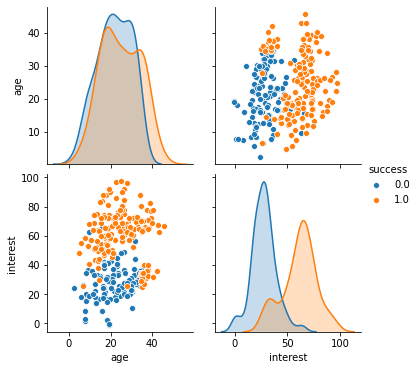

In [93]:
sns.pairplot(hue='success', data=c)
plt.show()

In [94]:
x = c[['age', 'interest']]
y = c['success']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


In [96]:
### Scaling
scaler = StandardScaler()
train_x = scaler.fit_transform(x_train)

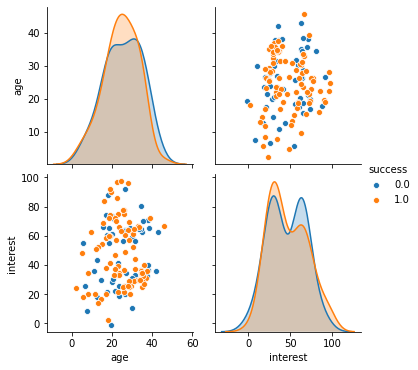

In [97]:
sns.pairplot(data=pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop=True)], axis=1), hue='success')
plt.show()

#### SVC

In [98]:
from sklearn.svm import SVC

In [99]:
### Modeling
# C = 오차 허용량
clf = SVC(C=0.5)
clf.fit(x_train, y_train)

SVC(C=0.5)

In [100]:
x_test_scaled = scaler.transform(x_test)
pred = clf.predict(x_test_scaled)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[39  0]
 [51  0]]
정확도	43.33%
정밀도	0.0%
재현율	0.0%
F1	0.0%


#### LinearSVC

In [101]:
from sklearn.svm import LinearSVC

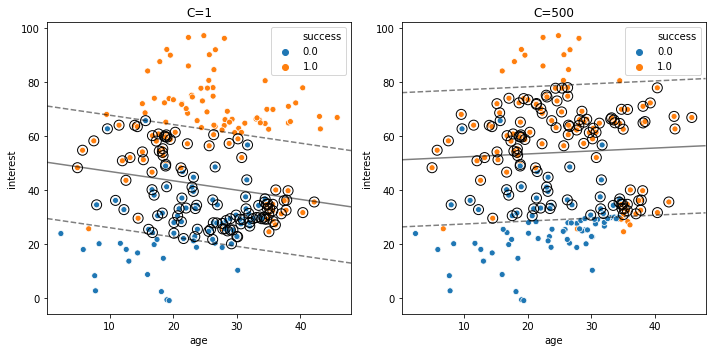

In [102]:
### Linear SVC
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(x_train, y_train)
    
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(x_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = x_train.iloc[support_vector_indices]

    plt.subplot(1, 2, i + 1) # subplot 생성
    sns.scatterplot(x=x_train.iloc[:, 0], y=x_train.iloc[:, 1], hue=y_train)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    plt.scatter(support_vectors.iloc[:, 0], support_vectors.iloc[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
    plt.title("C="+str(C))
    
plt.tight_layout()
plt.show()

#### PolynomialSVC

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42) # 반달 모양 데이터셋 만들기

### Polynomial SVM
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))])

polynomial_svm_clf.fit(x, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

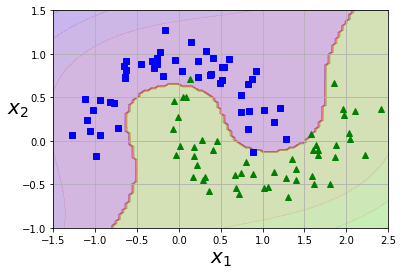

In [105]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^"),
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### Kernels

In [106]:
### Polynomial Kernel
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(x, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))]) # coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향받을지 조정
poly100_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

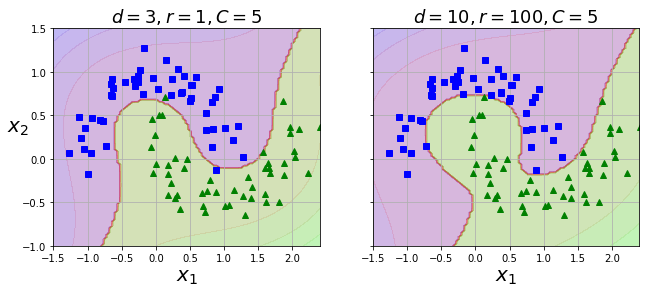

In [107]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

In [108]:
### Gaussian RBF Kernel
# gamma: 종 모양의 강도. 높을수록 좁아져서 결정 경계가 불규칙해짐
# C: 오차 허용 정도
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

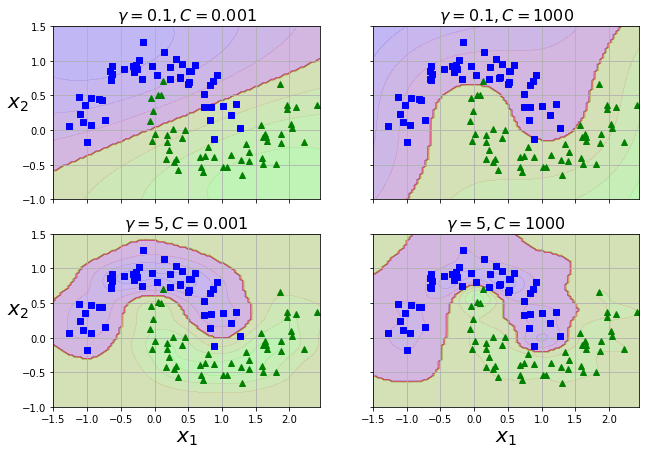

In [109]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### (2) SVRegressor

#### LinearSVR

In [110]:
### 샘플 data 생성
np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

print(x.shape, y.shape)

(50, 1) (50,)


In [111]:
from sklearn.svm import LinearSVR

In [112]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [113]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(x, y)
svm_reg2.fit(x, y)

svm_reg1.support_ = find_support_vectors(svm_reg1, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

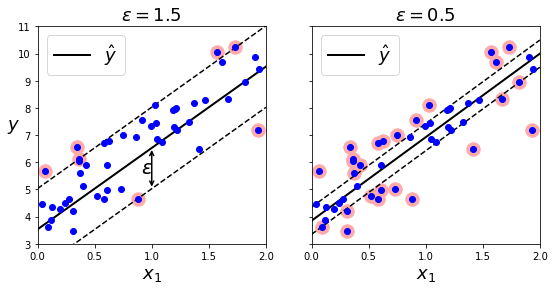

In [114]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non-linear SVR

In [115]:
### 샘플 data 생성
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
print(x.shape, y.shape)

(100, 1) (100,)


In [116]:
from sklearn.svm import SVR

In [117]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

SVR(C=0.01, degree=2, kernel='poly')

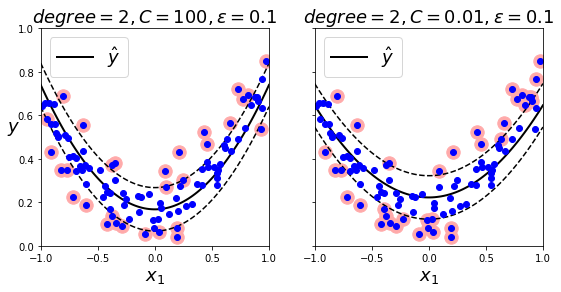

In [118]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [119]:
### 샘플데이터 생성하기
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

### 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(x[0:6], '\n\n', y[0:10])

[[0.07728308]
 [0.12157983]
 [0.48588247]
 [0.70042008]
 [0.84746373]
 [0.8855534 ]] 

 [-0.85313401  0.12128053  0.46698888  0.64453892  0.7496041  -0.32695163
  0.82838306  0.98609876  0.99471692  0.99514769]


In [120]:
### Model fit
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [121]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)
for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae, 2)
    
results

,mse,rmse,mae
Random_Forest,0.11,0.33,0.2
Linear,0.35,0.59,0.39
Polynomial,0.11,0.33,0.17


In [122]:
### support vector의 index 추출 -> array 반환
print(svr_rbf.support_)
print(svr_lin.support_)
print(svr_poly.support_)

[ 0  1  2  4  5  6  7  9 10 23 24 25 26 27 28 29 30 31 35 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 27 28 29 30 31 32 35 39]
[ 0  1  2  5 10 16 18 20 23 25 30 35 36 37]


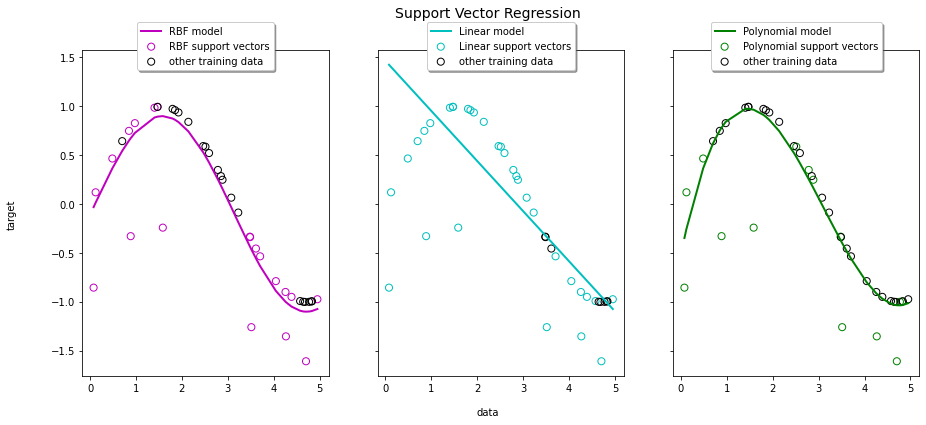

In [123]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x, svr.fit(x, y).predict(x), color=model_color[ix], lw=lw,
        label="{} model".format(kernel_label[ix]))
    axes[ix].scatter(
        x[svr.support_], y[svr.support_], facecolor="none", edgecolor=model_color[ix], s=50,
        label="{} support vectors".format(kernel_label[ix]))
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)], y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none", edgecolor="k", s=50, label="other training data")
    axes[ix].legend(
        loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## K-Nearest Neighbor (K-NN)
- K 개의 근접 이웃에 따른 라벨링/회귀선 도출 (default=5)
- 비모수적인 방법으로 결정경계가 불규칙한 경우에 유리
- K 값이 클 수록 경계 모호성이 줄어듦

### (1) KNN-Classifier

In [124]:
### liver patient data
liver = pd.read_csv('./ADP_book_ver01/data/indian_liver_patient.csv')

liver.Gender = np.where(liver.Gender=='Female', 0, 1) # target encoding
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [125]:
### NA 탐색
print(liver.isna().sum())

### drop NA
liver.dropna(axis=0, inplace=True)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [126]:
x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 10) (174, 10) (405,) (174,)


In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
### Modeling
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [130]:
pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[106  18]
 [ 39  11]]
정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### (2) KNN-Regressor

In [131]:
# 임의의 샘플데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [132]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
### Modeling
# uniform/distance. distance의 경우 가까운 이웃에 가중치가 있음
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(x_train, y_train)
knn_dis.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [134]:
uni_pred = knn_uni.predict(x_test)
dis_pred = knn_dis.predict(x_test)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse, 2)
    results.loc[nm]['rmse']=round(rmse, 2)
    results.loc[nm]['mae']=round(mae, 2)
results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


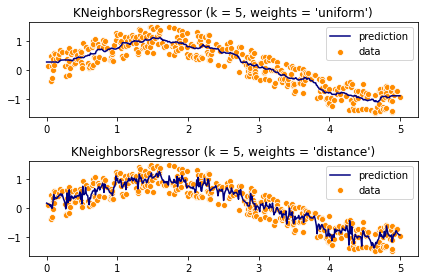

In [135]:
for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(x, y).predict(T)
    
    plt.subplot(2, 1, i + 1)
    sns.scatterplot(x=x.reshape(1, -1)[0], y=y.reshape(1, -1)[0], color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (5, weights))

plt.tight_layout()
plt.show()

## Decision Tree
- 의사결정 규칙을 Tree 구조로 나타내어 분류하거나 예측 -> 설명하기 쉽다
- input/target에 어떤 데이터 형태이든 사용 가능하며, 선형성/정규성 등 가정이 들어가지 않는다
- train data의 변화에 민감(Data의 회전 등)
- 노드 내 동질성, 노드 간 이질성이 커지도록 최적화
     - 분류: Chi-square statistic (크게), Gini index/Entropy index (작게)
     - 회귀: F-statistic, Variance reduction (크게)
- CART 알고리즘이 사용됨
- Root node, Parent/Child node, Terminal node
- Pruning으로 모형 단순화하여 Overfitting 방지 필요 (Overfitting 가능성 높음)
- 변수 중요도: 0-1 사이 숫차로 표현되며, 총 합은 1

### (1) DecisionTreeClassifier

In [136]:
### credit data
credit = pd.read_csv('./ADP_book_ver01/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [137]:
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
### Modeling
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4) # gini 불순도(default) 기준으로 하며, 두 개의 규제가 있음. 최대 노드 깊이, 노드 당 데이터 수
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [140]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[ 32  58]
 [ 31 179]]
정확도	70.33%
정밀도	75.53%
재현율	85.24%
F1	80.09%


In [141]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42        90
           1       0.76      0.85      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.68      0.70      0.69       300



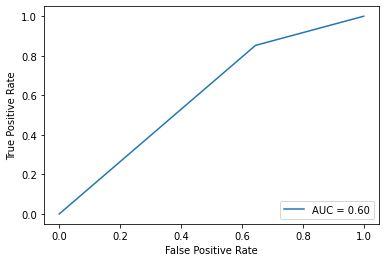

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(clf, x_test, y_test)
display.plot()

In [143]:
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', R_A_score)

ROC_AUC_score :  0.6954232804232805


In [144]:
importances = clf.feature_importances_ # 0~1 사이의 값
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,account.balance,0.276525
1,age,0.075409
2,apartment.type,0.022754
3,bank.credits,0.000000
4,credit.amount,0.109753
5,credit.duration.months,0.200911
6,credit.purpose,0.043163
7,current.assets,0.000000
8,dependents,0.000000
9,employment.duration,0.007947


In [145]:
import pydot
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from IPython.display import Image

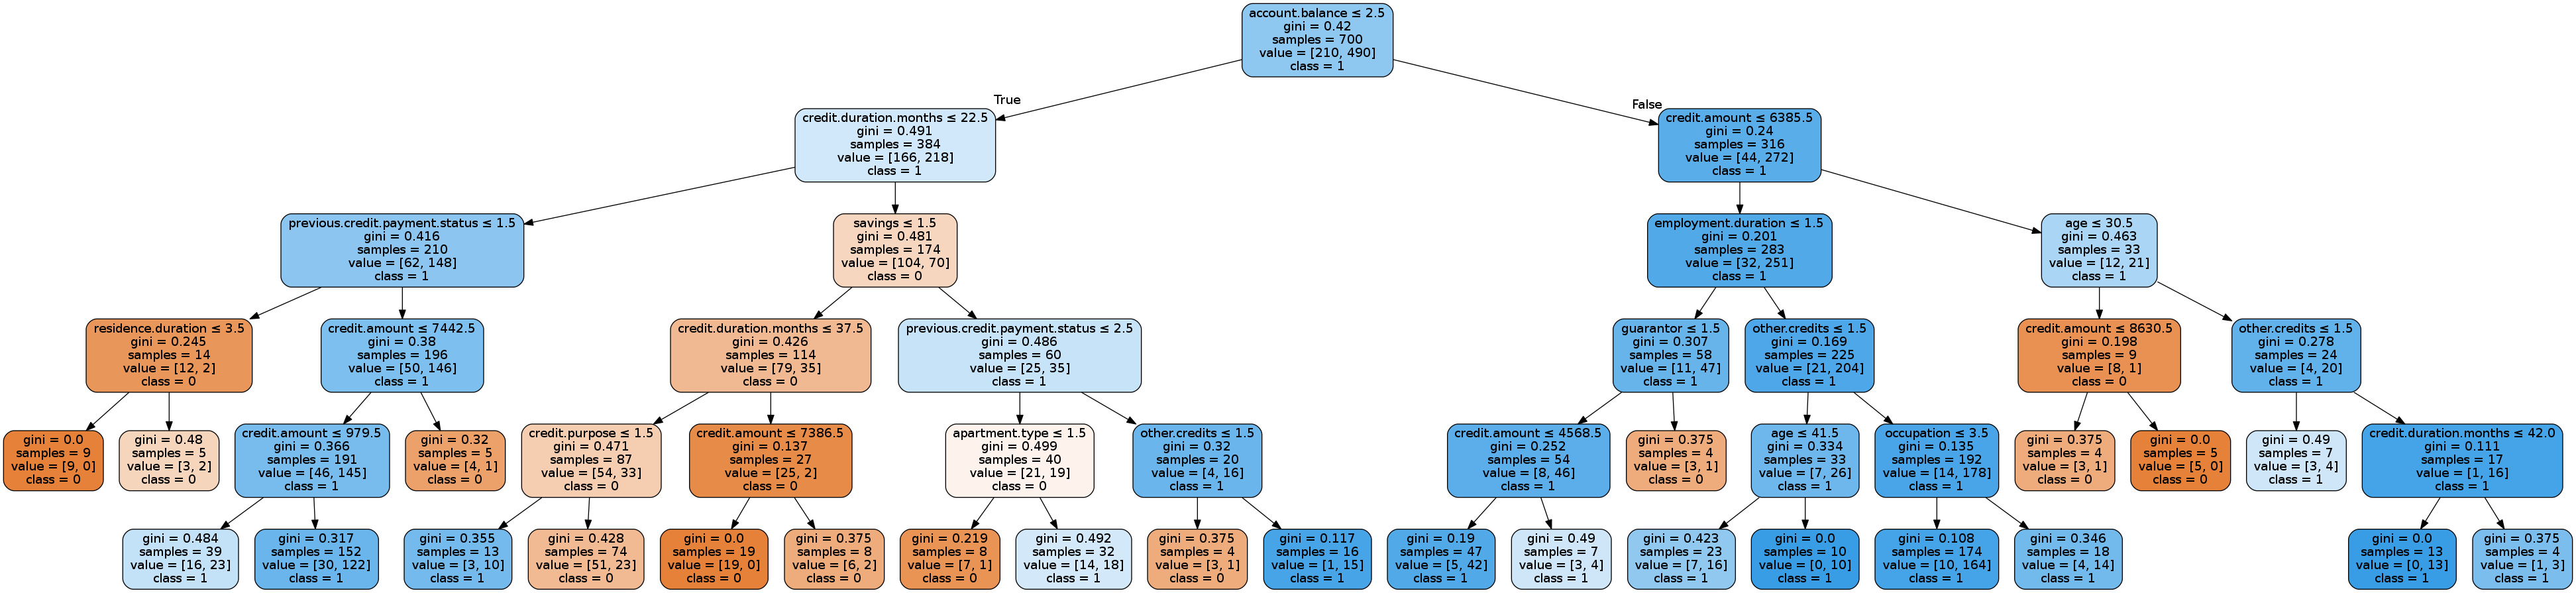

In [146]:
### Tree 시각화
feature_names = feature_columns
target_names = np.array(['0', '1'])

dt_dot_data = export_graphviz(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

### (2) DecisionTreeRegressor

In [147]:
### air quality data
air = pd.read_csv('./r_csv/datasets/airquality.csv', index_col='Unnamed: 0')

air = air.dropna()
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


In [148]:
x_train, x_test, y_train, y_test = train_test_split(air.drop('Ozone', axis=1), air['Ozone'], train_size=0.8, random_state=1)

In [149]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [151]:
pred = regr.predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'R2: {r2}')

mse: 643.7799941119765
mae: 16.327294685990342
R2: -0.06388309295315842


In [152]:
### 결정 경계 시각화 -> air quality data로 수정하여 반영 예정
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
x_test = np.arange(4.5, 350, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 Price 추출
x_feature = air['Solar.R'].values.reshape(-1, 1)
y_target = air['Ozone'].values.reshape(-1, 1)

# 학습과 예측 수행. 
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

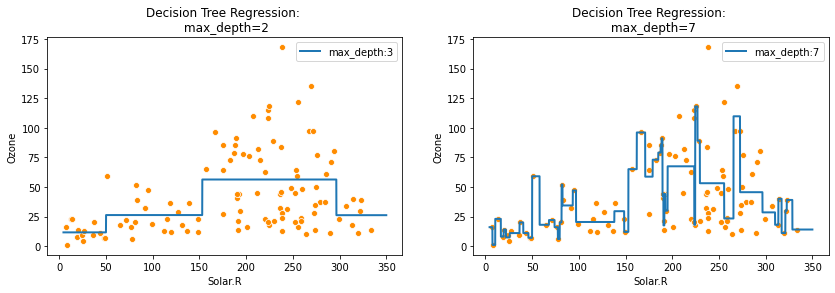

In [153]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 트리 회귀 예측 선 시각화
# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax1.set_title('Decision Tree Regression: \n max_depth=2')
sns.scatterplot(x=air['Solar.R'], y=air['Ozone'], color="darkorange", ax=ax1)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf2.reshape(1, -1)[0], label="max_depth:3", linewidth=2, ax=ax1)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=7')
sns.scatterplot(x=air['Solar.R'], y=air['Ozone'], color="darkorange", ax=ax2)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf7.reshape(1, -1)[0], label="max_depth:7", linewidth=2, ax=ax2)
plt.show()

## Naive Bayes
- 데이터가 특정 클래스에 속할 확률 계산
- 특징들은 상호 독립적이라는 가정
- 빠르고, 노이즈와 결측치에 강하지만, 독립 가정이 깨지는 경우 문제 발생
- 데이터가 많지 않거나, 미래 예측이 목적일 때 사용
- 라플라스 스무딩: 출현하지 않은 특징의 빈도 조정 (+1)

### (1) GaussianNB
- 연속적인 성질의 데이터를 분류하는 데 사용
- 특징들의 값은 정규분포를 가정하고 조건부 확률 계산

In [154]:
sky = pd.read_csv("./ADP_book_ver01/data/Skyserver.csv")
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

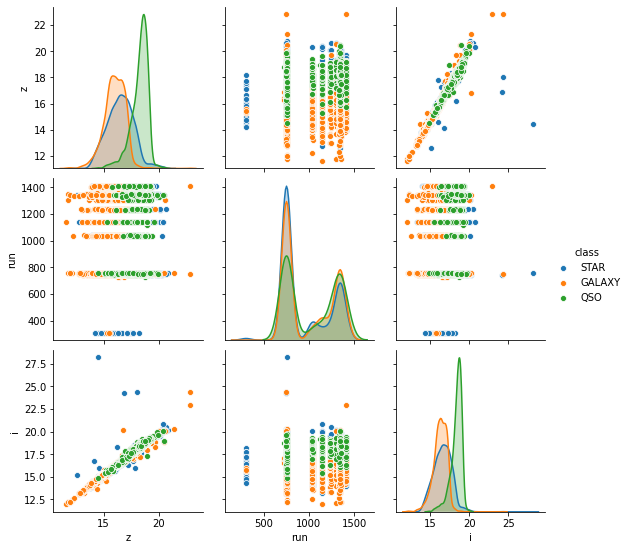

In [155]:
sns.pairplot(hue='class', data=sky[['z', 'run', 'i', 'class']])
plt.show()

In [156]:
features = list(sky.columns)
features.remove('class')
x = sky[features]
y = sky['class']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7000, 17) (7000,) (3000, 17) (3000,)


In [158]:
from sklearn.naive_bayes import GaussianNB

In [159]:
gnb = GaussianNB()

pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.799


In [160]:
gnb.predict_proba(x_test)[[0, 13, 68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [161]:
gnb.predict(x_test)[[0, 13, 68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [162]:
pred = gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



### (2) BernoulliNB
- 이산형 데이터 (1, 0으로 이루어진 데이터)를 input으로 함
- CountVertorizer

In [163]:
spam = pd.read_csv('./ADP_book_ver01/data/spam.csv', encoding='utf-8')
spam.head() # 잘못 로드된 column이 있음

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [164]:
spam = spam[['v1', 'v2']]
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [165]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [166]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [167]:
spam['label'] = np.where(spam['v1']=='spam', 1, 0) # encoding
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [168]:
x = spam['v2']
y = spam['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [169]:
from sklearn.feature_extraction.text import CountVectorizer 

In [170]:
### Text to count vector
# data를 1, 0으로 변환해야 함
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape # 메일 수, 단어 수

(3900, 7175)

In [171]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [172]:
print(cv.inverse_transform(encoded_input[[0]])) # original data 확인
print(cv.get_feature_names()[1000:1010], end='')

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]
['at', 'ate', 'athletic', 'athome', 'atlanta', 'atlast', 'atm', 'attach', 'attached', 'attack']

In [173]:
from sklearn.naive_bayes import BernoulliNB

In [174]:
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [175]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)
print(classification_report(y_test, pred))

Accuracy Score :  0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### (3) MultinomialNB
- 이산형 데이터를 input으로 함
- CounterVectorizer (binary=False)
- 출현 횟수에 따라 값이 달라질 때 사용

In [176]:
from sklearn.naive_bayes import MultinomialNB

In [177]:
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz", index_col="Unnamed: 0")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

loan_data.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [178]:
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
x = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]

In [179]:
naive_model = MultinomialNB(alpha=1e-10, fit_prior=False) # 사후 확률 비계산
naive_model.fit(x, y)

new_loan = x.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.562448  0.437552


## Artificial Neural Networks (ANN)
- 동물의 뇌 신경계를 모방하여 만들어진 모형
- Input layer, Hidden layer, Output layer
- 다양한 활성함수들: sign(threshold), step, sigmoid, softman, tanh, gauss

### (1) NN Basics

#### Perceptron
- TLU (Threshold logic unit)
- 입력의 가중치 합을 계산하여, Step function을 통해 결과 출력

In [180]:
from sklearn.datasets import load_iris

In [181]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target

x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = (iris.Class!=2).astype(np.int)

In [182]:
from sklearn.linear_model import Perceptron

In [183]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None) 와 동일
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

#### Activation functions

In [184]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

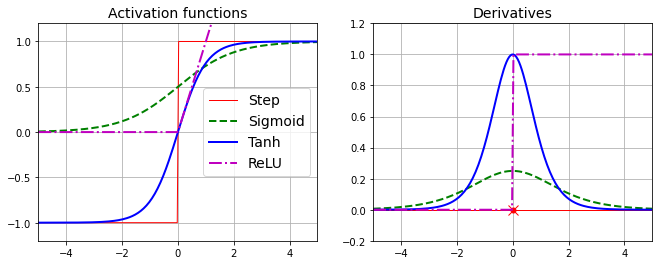

In [185]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#### Multi Perceptron (MLP)
- XOR 문제 해결 가능

In [186]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

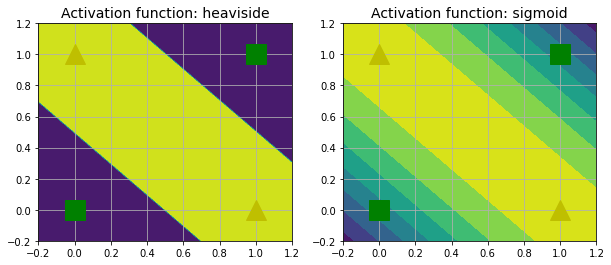

In [187]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### (2) MLP-Classifier

In [188]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [189]:
from sklearn.neural_network import MLPClassifier

In [190]:
### Modeling
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=2, max_iter=10000, random_state=1)
mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=2, max_iter=10000, random_state=1,
              solver='lbfgs')

In [191]:
pred = mlp.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred, average=None)
test_rcll = recall_score(y_test, pred, average=None)
test_f1 = f1_score(y_test, pred, average=None)

print(test_cm)
print('정확도\t{}'.format(test_acc))
print('정밀도\t{}'.format(test_prc))
print('재현율\t{}'.format(test_rcll))
print('F1\t{}'.format(test_f1))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
정확도	1.0
정밀도	[1. 1. 1.]
재현율	[1. 1. 1.]
F1	[1. 1. 1.]


In [192]:
mlp.coefs_

[array([[ -0.16594035,   7.19341217],
        [ -0.99967701,   8.30118013],
        [ -0.70642163, -11.15587477],
        [ -0.62742043,  -9.37536558]]),
 array([[ -0.17701926,   0.40575734,  -0.64745165],
        [ 14.79742108,   8.73623989, -23.36722916]])]

### (3) MLP-Regressor

In [193]:
from sklearn.neural_network import MLPRegressor

In [194]:
### random sqrt data
x = np.random.randint(0, 100, 50).reshape(-1, 1)
y = np.sqrt(x)

In [195]:
### Modeling
mlp = MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
mlp.fit(x, y)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(10, 8), random_state=1,
             solver='lbfgs')

In [196]:
new_x = np.random.randint(0, 100, 10)
new_x

array([37, 47, 61, 50, 68, 76, 57,  4, 36, 80])

In [197]:
mlp.predict(new_x.reshape(-1, 1))

array([5.68150251, 6.52483546, 7.70550159, 6.77783535, 8.29583466,
       8.96217814, 7.36816841, 2.91575085, 5.59716922, 9.27208948])

In [198]:
mlp.score(x, y)

0.9815319934829561